# CS Students Performance Data Analysis
## Comprehensive Exploratory Data Analysis and Insights

## Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## Download and Load Data

First, you'll need to:
1. Install Kaggle CLI: `pip install kaggle`
2. Download your Kaggle API token from https://www.kaggle.com/account
3. Place it at ~/.kaggle/kaggle.json

Or manually download the CSV from the Kaggle link and place it in the working directory.

In [2]:
import os
from pathlib import Path

# Check if file exists locally
csv_file = 'cs_students.csv'
data_path = Path(csv_file)

if not data_path.exists():
    print("Attempting to download from Kaggle...")
    try:
        import subprocess
        # Download using Kaggle CLI
        subprocess.run(['kaggle', 'datasets', 'download', '-d', 'zahranusratt/cs-students-performance-dataset', 
                       '-p', '.', '--unzip'], check=True)
        print("Dataset downloaded successfully!")
    except Exception as e:
        print(f"Error downloading: {e}")
        print("Please download manually from: https://www.kaggle.com/datasets/zahranusratt/cs-students-performance-dataset")
else:
    print(f"Found {csv_file}")

Found cs_students.csv


In [3]:
# Load the data
df = pd.read_csv('cs_students.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (180, 12)

First few rows:


,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


## Data Overview

In [4]:
# Display basic information
print("Dataset Information:")
print(f"Total Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"\nColumn Names and Types:")
print(df.dtypes)

Dataset Information:
Total Records: 180
Total Features: 12

Column Names and Types:
Student ID             int64
Name                     str
Gender                   str
Age                    int64
GPA                  float64
Major                    str
Interested Domain        str
Projects                 str
Future Career            str
Python                   str
SQL                      str
Java                     str
dtype: object


In [5]:
# Statistical summary
print("Statistical Summary:")
df.describe(include='all')

Statistical Summary:


,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
count,180.000000,180,180,180.000000,180.000000,180,180,180,180,180,180,180
unique,NaN,89,2,NaN,NaN,1,27,65,33,3,3,3
top,NaN,James Wilson,Male,NaN,NaN,Computer Science,Artificial Intelligence,Network Security,Web Developer,Strong,Strong,Strong
freq,NaN,8,102,NaN,NaN,180,19,14,19,70,79,69
mean,90.500000,NaN,NaN,22.116667,3.615000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,52.105662,NaN,NaN,2.823040,0.177341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,45.750000,NaN,NaN,21.000000,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,90.500000,NaN,NaN,22.000000,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,135.250000,NaN,NaN,22.250000,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for missing values
print("Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing.sum() == 0:
    print("No missing values found!")

Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
No missing values found!


In [7]:
# Display all columns
print("All Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

All Columns:
1. Student ID
2. Name
3. Gender
4. Age
5. GPA
6. Major
7. Interested Domain
8. Projects
9. Future Career
10. Python
11. SQL
12. Java


## Exploratory Data Analysis (EDA)

### Numerical Features Analysis

Numerical columns: ['Student ID', 'Age', 'GPA']


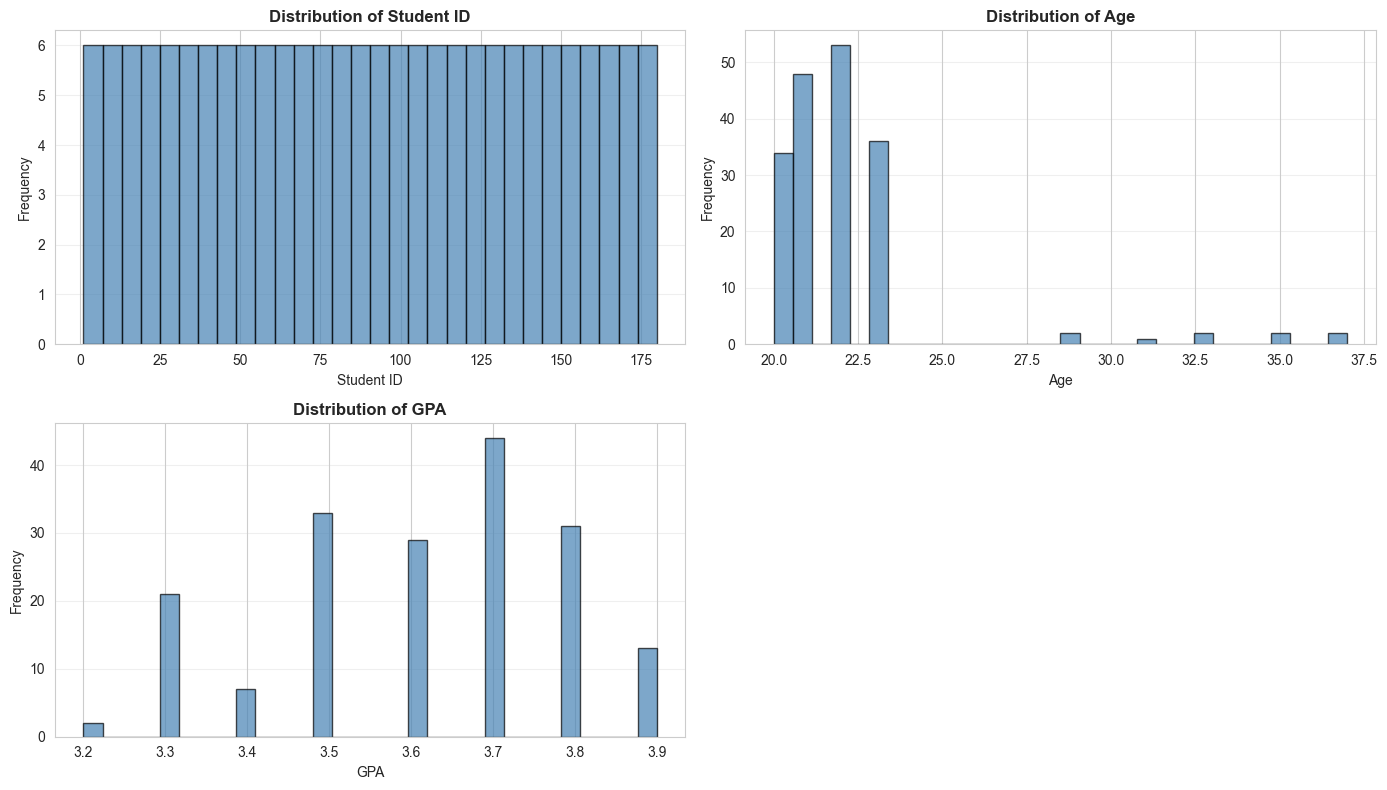


Displayed distributions for 3 numerical features


In [8]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Distribution of numerical features
n_cols = len(numerical_cols)
fig, axes = plt.subplots((n_cols + 1) // 2, 2, figsize=(14, 4 * ((n_cols + 1) // 2)))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots
for idx in range(n_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()
print(f"\nDisplayed distributions for {n_cols} numerical features")

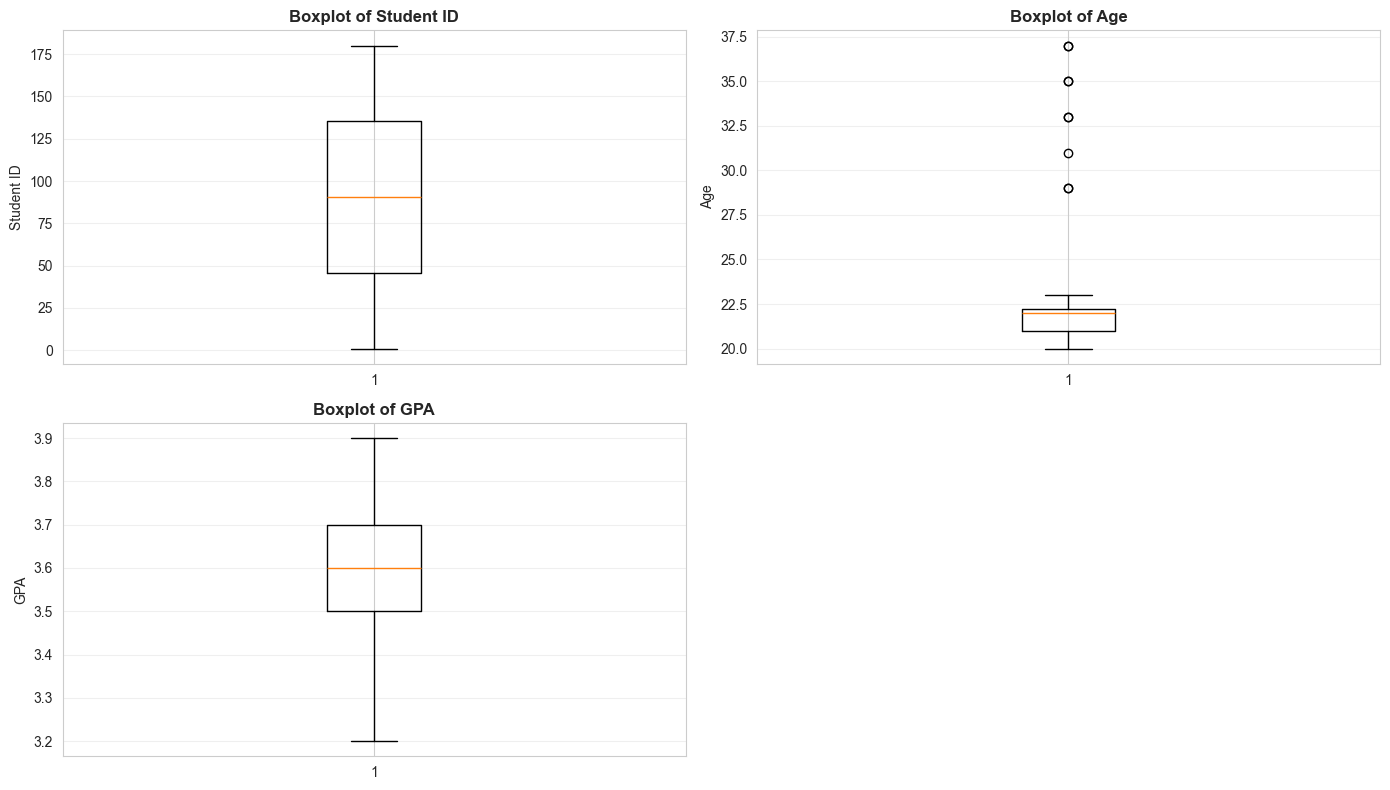

Box plots displayed


In [9]:
# Box plots for numerical features
fig, axes = plt.subplots((n_cols + 1) // 2, 2, figsize=(14, 4 * ((n_cols + 1) // 2)))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(n_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()
print("Box plots displayed")

### Categorical Features Analysis

In [10]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

if categorical_cols:
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())

Categorical columns: ['Name', 'Gender', 'Major', 'Interested Domain', 'Projects', 'Future Career', 'Python', 'SQL', 'Java']

Name:
Name
James Wilson      8
Olivia Clark      7
Michael Brown     6
Laura Lee         6
Sophia Johnson    6
                 ..
Sophia Wilson     1
James Miller      1
Matthew Lee       1
Isabella Brown    1
Elijah Smith      1
Name: count, Length: 89, dtype: int64

Gender:
Gender
Male      102
Female     78
Name: count, dtype: int64

Major:
Major
Computer Science    180
Name: count, dtype: int64

Interested Domain:
Interested Domain
Artificial Intelligence           19
Web Development                   19
Cybersecurity                     18
Mobile App Development            17
Database Management               16
Cloud Computing                   16
Data Science                      13
Machine Learning                  13
Computer Graphics                 13
Software Development              11
Software Engineering               5
Bioinformatics             

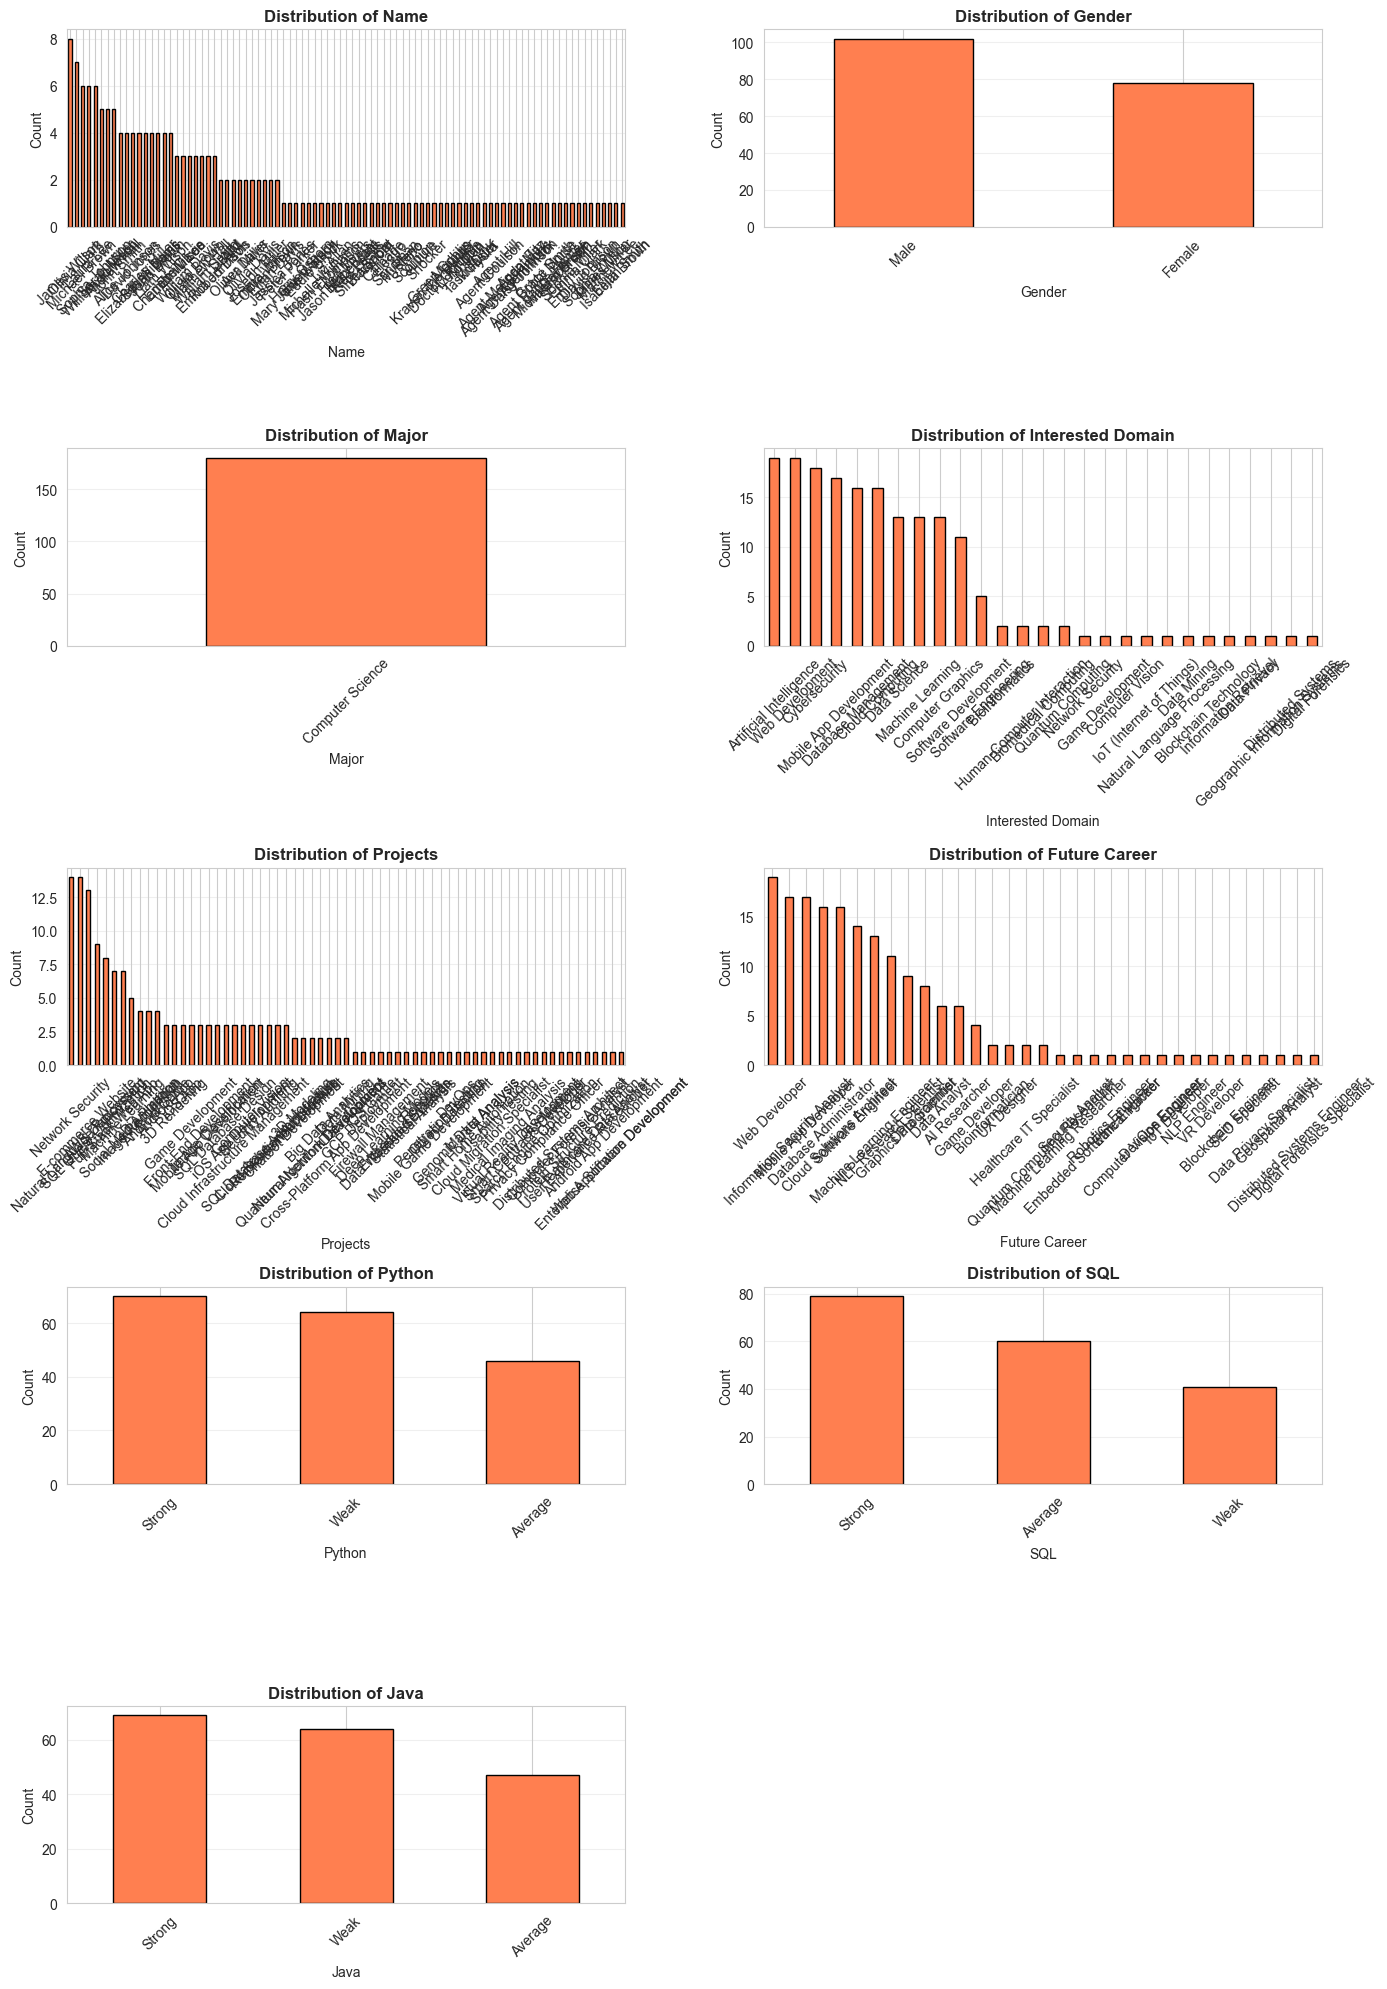

In [11]:
# Visualize categorical features
if categorical_cols:
    fig, axes = plt.subplots((len(categorical_cols) + 1) // 2, 2, 
                             figsize=(14, 4 * ((len(categorical_cols) + 1) // 2)))
    axes = axes.flatten()
    
    for idx, col in enumerate(categorical_cols):
        df[col].value_counts().plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(axis='y', alpha=0.3)
    
    for idx in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

### Correlation Analysis

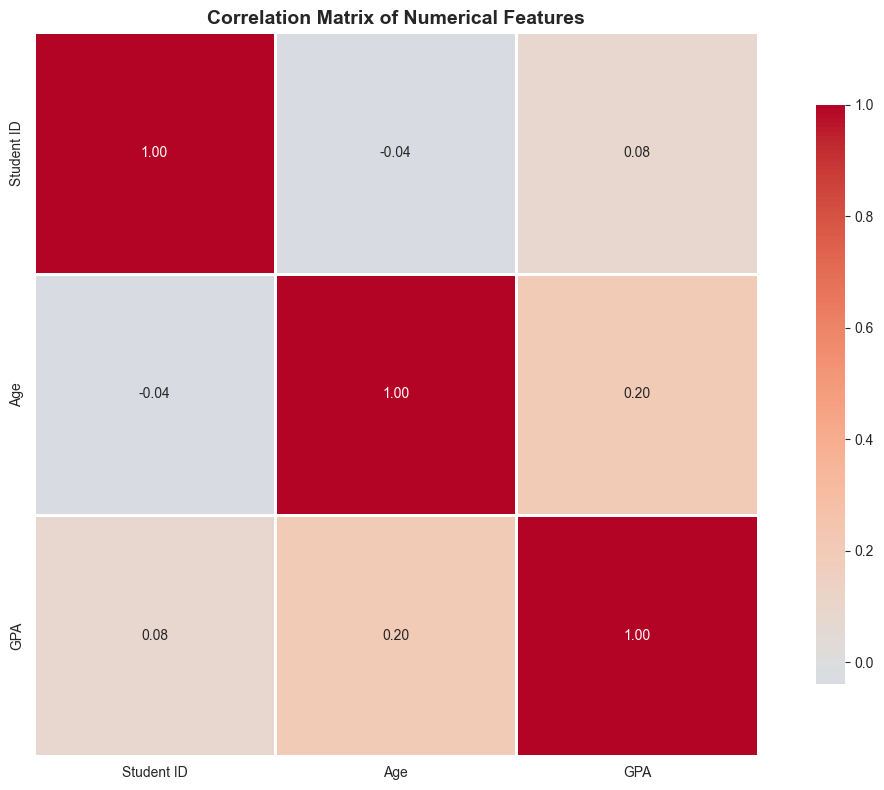


Top Correlations (excluding 1.0):
Age <-> GPA: 0.203
Student ID <-> GPA: 0.083
Student ID <-> Age: -0.039


In [12]:
if len(numerical_cols) > 1:
    # Correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\nTop Correlations (excluding 1.0):")
    # Get top correlations
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))
    
    corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:10]
    for col1, col2, corr in corr_pairs_sorted:
        print(f"{col1} <-> {col2}: {corr:.3f}")

### Performance Distribution Analysis

Looking for performance-related columns...
Found performance columns: ['GPA']


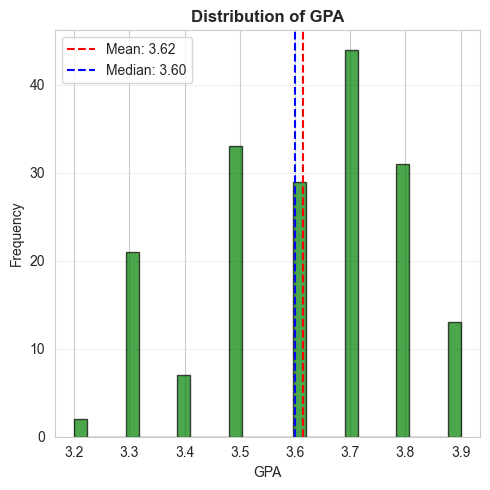

In [13]:
# If there's a performance or grade column, analyze it
print("Looking for performance-related columns...")
performance_cols = [col for col in df.columns if any(keyword in col.lower() 
                    for keyword in ['grade', 'score', 'gpa', 'performance', 'mark', 'final', 'result'])]

if performance_cols:
    print(f"Found performance columns: {performance_cols}")
    
    fig, axes = plt.subplots(1, len(performance_cols), figsize=(5*len(performance_cols), 5))
    if len(performance_cols) == 1:
        axes = [axes]
    
    for idx, col in enumerate(performance_cols):
        axes[idx].hist(df[col], bins=30, color='green', alpha=0.7, edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
        axes[idx].axvline(df[col].median(), color='blue', linestyle='--', label=f'Median: {df[col].median():.2f}')
        axes[idx].legend()
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No specific performance columns found. Check data structure.")

### Relationships Between Variables

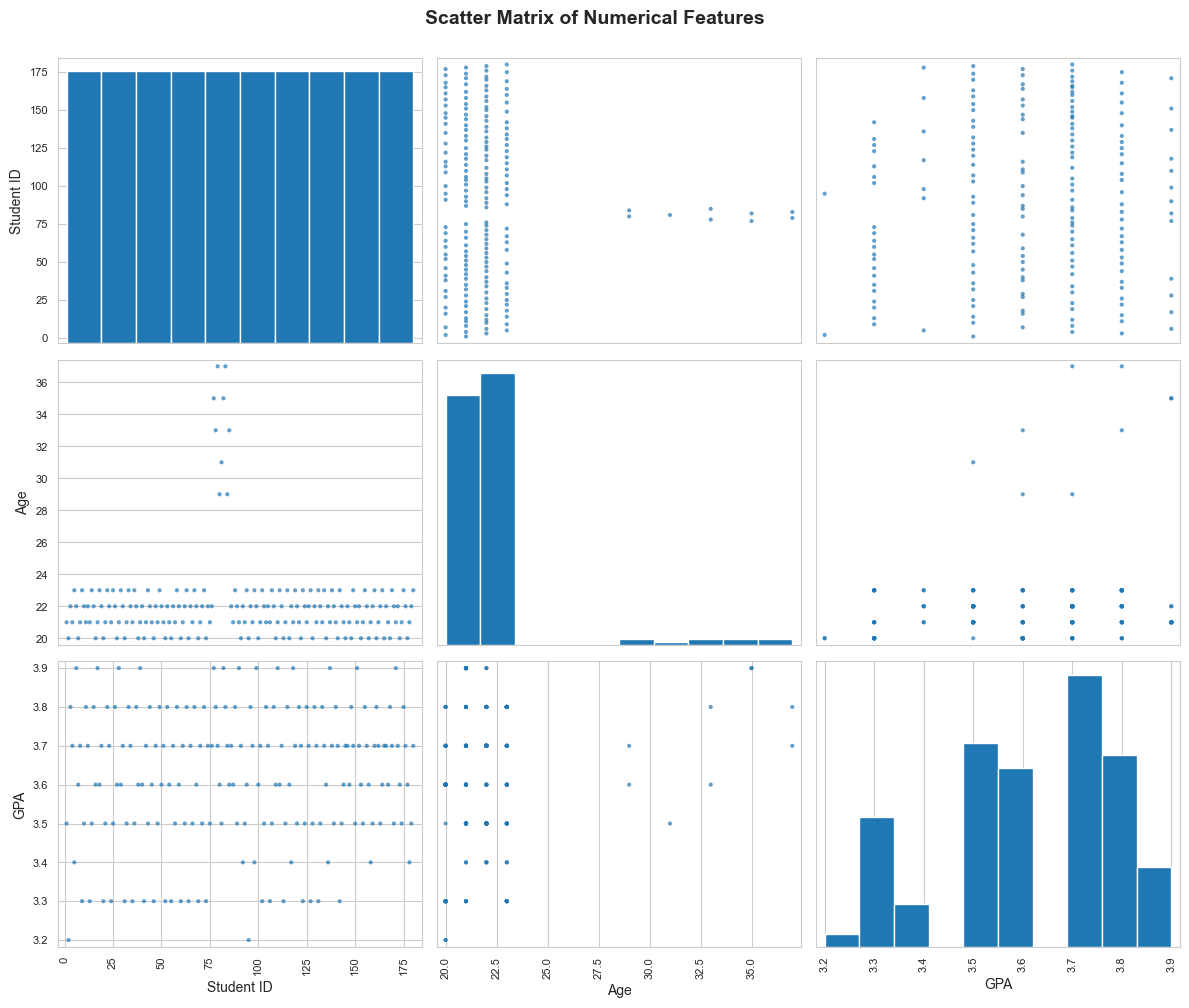

In [14]:
# Scatter plot matrix for numerical features (if not too many)
if len(numerical_cols) <= 6:
    pd.plotting.scatter_matrix(df[numerical_cols], figsize=(12, 10), 
                               diagonal='hist', alpha=0.7)
    plt.suptitle('Scatter Matrix of Numerical Features', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
else:
    print(f"Too many numerical features ({len(numerical_cols)}) for scatter matrix. Creating subset...")
    # Select first 6 most important numerical columns
    subset_cols = numerical_cols[:6]
    pd.plotting.scatter_matrix(df[subset_cols], figsize=(12, 10), 
                               diagonal='hist', alpha=0.7)
    plt.suptitle('Scatter Matrix (First 6 Numerical Features)', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

## Statistical Insights

In [15]:
# Calculate skewness and kurtosis for numerical features
print("Skewness and Kurtosis Analysis:")
print("="*60)

stats_df = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Std Dev': df[numerical_cols].std(),
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis()
})

print(stats_df.round(3))

Skewness and Kurtosis Analysis:
              Mean  Median  Std Dev  Skewness  Kurtosis
Student ID  90.500    90.5   52.106     0.000    -1.200
Age         22.117    22.0    2.823     3.625    14.485
GPA          3.615     3.6    0.177    -0.400    -0.649


In [16]:
# Outlier detection using IQR method
print("\nOutlier Detection (IQR Method):")
print("="*60)

outlier_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'Count': len(outliers),
        'Percentage': (len(outliers) / len(df)) * 100
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df[outlier_df['Count'] > 0].sort_values('Count', ascending=False)

if len(outlier_df) > 0:
    print(outlier_df)
else:
    print("No significant outliers detected")


Outlier Detection (IQR Method):
     Count  Percentage
Age    9.0         5.0


## Key Findings Summary

In [17]:
print("\n" + "="*70)
print("DATA ANALYSIS SUMMARY")
print("="*70)

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Total Records: {len(df):,}")
print(f"   - Total Features: {len(df.columns)}")
print(f"   - Numerical Features: {len(numerical_cols)}")
print(f"   - Categorical Features: {len(categorical_cols)}")
print(f"   - Missing Values: {'None' if df.isnull().sum().sum() == 0 else df.isnull().sum().sum()}")

print(f"\n2. NUMERICAL FEATURES SUMMARY:")
for col in numerical_cols:
    print(f"   - {col}: Mean={df[col].mean():.2f}, Std={df[col].std():.2f}, "
          f"Range=[{df[col].min():.2f}, {df[col].max():.2f}]")

if categorical_cols:
    print(f"\n3. CATEGORICAL FEATURES:")
    for col in categorical_cols:
        print(f"   - {col}: {df[col].nunique()} unique values")
        print(f"     Top 3: {dict(df[col].value_counts().head(3))}")

print(f"\n" + "="*70)


DATA ANALYSIS SUMMARY

1. DATASET OVERVIEW:
   - Total Records: 180
   - Total Features: 12
   - Numerical Features: 3
   - Categorical Features: 9
   - Missing Values: None

2. NUMERICAL FEATURES SUMMARY:
   - Student ID: Mean=90.50, Std=52.11, Range=[1.00, 180.00]
   - Age: Mean=22.12, Std=2.82, Range=[20.00, 37.00]
   - GPA: Mean=3.62, Std=0.18, Range=[3.20, 3.90]

3. CATEGORICAL FEATURES:
   - Name: 89 unique values
     Top 3: {'James Wilson': np.int64(8), 'Olivia Clark': np.int64(7), 'Michael Brown': np.int64(6)}
   - Gender: 2 unique values
     Top 3: {'Male': np.int64(102), 'Female': np.int64(78)}
   - Major: 1 unique values
     Top 3: {'Computer Science': np.int64(180)}
   - Interested Domain: 27 unique values
     Top 3: {'Artificial Intelligence': np.int64(19), 'Web Development': np.int64(19), 'Cybersecurity': np.int64(18)}
   - Projects: 65 unique values
     Top 3: {'Network Security': np.int64(14), 'Natural Language Processing': np.int64(14), 'E-commerce Website': np.i

## Recommendations for Further Analysis

In [18]:
print("""
Suggestions for deeper analysis:

1. PREDICTIVE MODELING:
   - Build a regression model to predict student performance
   - Use features like study hours, GPA, etc. as predictors

2. CLUSTERING:
   - Identify student groups with similar characteristics
   - Use K-means or hierarchical clustering

3. STATISTICAL TESTS:
   - Perform ANOVA to compare performance across groups
   - Chi-square tests for categorical relationships

4. FEATURE ENGINEERING:
   - Create derived features (e.g., study intensity ratios)
   - Normalize features for modeling

5. TIME SERIES ANALYSIS:
   - If temporal data exists, analyze performance trends

6. SEGMENTATION:
   - Identify high/low performers
   - Analyze characteristics of top students
""")


Suggestions for deeper analysis:

1. PREDICTIVE MODELING:
   - Build a regression model to predict student performance
   - Use features like study hours, GPA, etc. as predictors

2. CLUSTERING:
   - Identify student groups with similar characteristics
   - Use K-means or hierarchical clustering

3. STATISTICAL TESTS:
   - Perform ANOVA to compare performance across groups
   - Chi-square tests for categorical relationships

4. FEATURE ENGINEERING:
   - Create derived features (e.g., study intensity ratios)
   - Normalize features for modeling

5. TIME SERIES ANALYSIS:
   - If temporal data exists, analyze performance trends

6. SEGMENTATION:
   - Identify high/low performers
   - Analyze characteristics of top students

